<h1>Tabla de contenido 💜<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Transformada-Cuántica-de-Fourier" data-toc-modified-id="Transformada-Cuántica-de-Fourier-1">Transformada Cuántica de Fourier</a></span><ul class="toc-item"><li><span><a href="#1.-Introducción" data-toc-modified-id="1.-Introducción-1.1">1. Introducción</a></span></li><li><span><a href="#2.-Intuición" data-toc-modified-id="2.-Intuición-1.2">2. Intuición</a></span><ul class="toc-item"><li><span><a href="#2.1-Contando-en-bases-de-Fourier" data-toc-modified-id="2.1-Contando-en-bases-de-Fourier-1.2.1">2.1 Contando en bases de Fourier</a></span></li></ul></li><li><span><a href="#3.-Ejemplo-1:-QFT-1-qubit" data-toc-modified-id="3.-Ejemplo-1:-QFT-1-qubit-1.3">3. Ejemplo 1: QFT 1-qubit</a></span></li><li><span><a href="#4.-La-transformada-Cuántica-de-Fourier" data-toc-modified-id="4.-La-transformada-Cuántica-de-Fourier-1.4">4. La transformada Cuántica de Fourier</a></span></li><li><span><a href="#5.-El-circuito-que-implementa-QFT" data-toc-modified-id="5.-El-circuito-que-implementa-QFT-1.5">5. El circuito que implementa QFT</a></span></li><li><span><a href="#6.-Ejemplo-3:-QFT-con-3-qubits" data-toc-modified-id="6.-Ejemplo-3:-QFT-con-3-qubits-1.6">6. Ejemplo 3: QFT con 3 qubits</a></span></li><li><span><a href="#7.-Algunas-notas-sobre-la-forma-del-circuito-de-la-QFT" data-toc-modified-id="7.-Algunas-notas-sobre-la-forma-del-circuito-de-la-QFT-1.7">7. Algunas notas sobre la forma del circuito de la QFT</a></span></li><li><span><a href="#8.-Implementación-en-Qiskit" data-toc-modified-id="8.-Implementación-en-Qiskit-1.8">8. Implementación en Qiskit</a></span><ul class="toc-item"><li><span><a href="#8.1-Implementación-en-3-qubits" data-toc-modified-id="8.1-Implementación-en-3-qubits-1.8.1">8.1 Implementación en 3 qubits</a></span></li><li><span><a href="#8.2-QFT-caso-general" data-toc-modified-id="8.2-QFT-caso-general-1.8.2">8.2 QFT caso general</a></span></li><li><span><a href="#8.3-Corriendo-una-QFT-en-un-dispositivo-cuántico-real" data-toc-modified-id="8.3-Corriendo-una-QFT-en-un-dispositivo-cuántico-real-1.8.3">8.3 Corriendo una QFT en un dispositivo cuántico real</a></span></li></ul></li></ul></li></ul></div>

# Transformada Cuántica de Fourier

Vamos a introducir la transformada cuántica de Fourier (QFT), derivar el circuito e implementarlo utilizando Qiskit. Mostraremos cómo correr una QFT en un simulador y en dispositivo real de 5 qubits.

## 1. Introducción

La transformada de Fourier ocurre de muchas maneras en distintas versiones a lo largo de la computación clásica, en áreas tan diversas desde el procesamiento de señales hasta la compresión de datos e incluso, la teoría de la complejidad. La transformada cuántica de Fourier (QFT) es la implementación cuántica de una transformada de Fourier discreta sobre las amplitudes de nuestra función de onda. Esto es una parte de muchos algoritmos, más notablemente del a--lgoritmo de Shor** y en el estimador de fase cuántica.

La transformación discreta de Fourier actúa sobre un vector $(x_0,\dots,x_{N-1})$ y lo cambia al vector $(y_0,\dots,y{N-1})$ acorde con la fórmula:

$$y_k = \frac{1}{N} \sum_{j=0}^{N-1}{x_j \omega_N^{jk}}$$

donde 
$$\omega_N ^{jk} = e^{2\pi i \frac{jk}{N}}$$

De forma similar, la transformada cuántica de Fourier actúa sobre un estado cuántico $\sum_{i = 0}^{N-1}{x_i | i \rangle}$ y lo asigna al estado cuántico $\sum_{i = 0}^{N-1}{y_i | i \rangle}$ de acuerdo con la fórmula:

$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$

con $\omega_N ^{jk}$ definida como lo hicimos anteriormente. Notemos que solamente las amplitudes del estado fueron afectar por esta transformación.

Esto puede ser expresado también como la asignación:

$$\vert x \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle$$

O como la matriz unitaria:

$$U_{QFT} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} \omega_N^{xy} \vert y \rangle \langle x \vert$$

## 2. Intuición

La transformada cuántica de Fourier (QFT) se hace entre 2 bases, la base computacional (Z) y la base de Fourier. La compuerta H es de hecho, la QFT para un qubit individual y transforma nuestra base computacional $|0 \rangle$ y $|1 \rangle$ en las bases de Fourier $|+ \rangle$ y $|- \rangle$. De la misma forma, todos los estados multiqubit en nuestra base computacional tienen estados correspondientes en la base de Fourier.  La QFT es simplemente una función que hace transformaciones entre estas bases.

$$|\text{State in Computational Basis}\rangle \quad \xrightarrow[]{\text{QFT}} \quad |\text{State in Fourier Basis}\rangle$$

$$\text{QFT}|x\rangle = |\widetilde{x}\rangle$$

Usualmente denotaremos a los estados de una base de Fourier con la tilde (~).

### 2.1 Contando en bases de Fourier

En las bases computacionales, podemos guardar números en binario utilizando nuestros estados $|0\rangle$ y $|1\rangle$:

![](https://qiskit.org/textbook/ch-algorithms/images/zbasis-counting.gif)

Notemos que la frecuencia con la cual cambian nuestros qubits; el qubit más a la izquierda cambia en el incremento de cada número, el siguiente con 2 incrementos, el tercero con 4 y así sucesivamente. 

En una base de Fourier, podemos guardar o codificar nuestros números utilizando diferentes rotaciones alrededor de el eje $Z$:

![](https://qiskit.org/textbook/ch-algorithms/images/fourierbasis-counting.gif)

El número que queremos guardar dicta el angulo en el que cada qubit es rotado alrededor de nuestro eje $Z$. En el estado $|\widetilde{0}\rangle$, todos los qubits están en el estado $|+\rangle$. Como se ve en el ejemplo anterior, para codificar el estado $|\widetilde{5}\rangle$ en 4 qubits, rotamos el qubit más a la izquierda por $\frac{2}{2^n}= \frac{5}{16}$. El siguiente qubit se gira el doble del ángulo en cada giro, es decir $\frac{10}{16} = 2\pi$radianes o $10/16$ de vuelta, y así seguimos doblando el ángulo de nuestros qubits a la derecha, hasta que el último de ellos solo tenga 2 movimientos entre las bases $|+\rangle$ y $|-\rangle$.

De nuevo, notemos la frecuencia con la que cada qubit cambia. El qubit 0 (más a la izquierda) en este caso tiene una frecuencia menor, y el que está a la derecha tiene una frecuencia mayor.

## 3. Ejemplo 1: QFT 1-qubit

Consideremos el operador QFT como está definido anteriormente, actuando en un qubit individual con estado $| \psi \rangle = \alpha |0\rangle + \beta | 1 \rangle $. En este caso, $x_0 = \alpha$, $x_1 = \beta$ y $N=2$. Entonces,

$$y_0 = \frac{1}{\sqrt{2}}\left(    \alpha \exp\left(2\pi i\frac{0\times0}{2}\right) + \beta \exp\left(2\pi i\frac{1\times0}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha + \beta\right)$$

$$y_1 = \frac{1}{\sqrt{2}}\left(    \alpha \exp\left(2\pi i\frac{0\times1}{2}\right) + \beta \exp\left(2\pi i\frac{1\times1}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha - \beta\right)$$

tal que el resultado final es el estado:

$$U_{QFT}\vert\psi\rangle = \frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle$$

este resultado es exactamente el mismo que al aplicar el operador de Hadamard en el qubits:

$$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

Si aplicaramos el operador $H$ al estado $|\psi \rangle  = \alpha |0\rangle + \beta |1\rangle$, obtendríamos el nuevo estado:

$$\frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle 
\equiv \tilde{\alpha}\vert 0 \rangle + \tilde{\beta}\vert 1 \rangle$$

Notemos como la compuerta Hadamard aplica una transformada de Fourier discreta para $N=2$ en las amplitudes de nuestros estados.

## 4. La transformada Cuántica de Fourier

Entonces, ¿Cómo luciría la transformada de Fuorier para valore de $N$ más largos? Derivemos una transformación para $N=2$, con $QFT_N$ actuando en el estado $|x\rangle = |x_1 + \dots + x_n\rangle$ donde $x_1$ es el bit más significante. Las matemáticas siguientes son para aquellos a quienes las entiendan y les sean de utilidad, así que no te preocupes si no las entiendes (como yo xd); por ahora podemos continuar con la intuición obtenida en la sección 2.

$$\begin{aligned}
QFT_N\vert x \rangle & = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i xy / 2^n} \vert y \rangle ~\text{since}\: \omega_N^{xy} = e^{2\pi i \frac{xy}{N}} \:\text{and}\: N = 2^n 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i \left(\sum_{k=1}^n y_k/2^k\right) x} \vert y_1 \ldots y_n \rangle \:\text{rewriting in fractional binary notation}\: y = y_1\ldots y_n, y/2^n = \sum_{k=1}^n y_k/2^k 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \prod_{k=1}^n e^{2 \pi i x y_k/2^k } \vert y_1 \ldots y_n \rangle \:\text{after expanding the exponential of a sum to a product of exponentials} 
\\
& = \frac{1}{\sqrt{N}} \bigotimes_{k=1}^n  \left(\vert0\rangle + e^{2 \pi i x /2^k } \vert1\rangle \right) \:\text{after rearranging the sum and products, and expanding} 
\sum_{y=0}^{N-1} = \sum_{y_1=0}^{1}\sum_{y_2=0}^{1}\ldots\sum_{y_n=0}^{1} 
\\
& = \frac{1}{\sqrt{N}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) 
\otimes  
\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right) 
\end{aligned}$$

Básicamente es la descripción matemática de la animación:

![](https://qiskit.org/textbook/ch-algorithms/images/fourierbasis-counting.gif)

## 5. El circuito que implementa QFT

El circuito para implementar la QFT hace uso de 2 compuertas. La primera es una compuerta Hadamard de 1 solo qubit, $H$, que ya conocemos. Y como vimos, el efecto de la Hadamard en nuestro estado $|x_k\rangle$ qubit es:

$$H\vert x_k \rangle = \frac{1}{\sqrt{2}}\left(\vert0\rangle + \exp\left(\frac{2\pi i}{2}x_k\right)\vert1\rangle\right)$$

La segunda compuerta a usar es una rotación controlada de 2 qubits $CROT_k$ dandonos lo siguiente:

$$
CROT_k = \left[\begin{matrix}
I&0\\
0&UROT_k\\
\end{matrix}\right]
$$

donde

$$UROT_k = \left[\begin{matrix}
1&0\\
0&\exp\left(\frac{2\pi i}{2^k}\right)\\
\end{matrix}\right]$$

La acción de la $CROT_k$ en un estado de 2 qubits $|x_lx_k\rangle$, donde el primer qubit es el qubits de control y el segundo es el qubit objetivo, está dada por:

$$CROT_k\vert 0x_j\rangle = \vert 0x_j\rangle$$

y

$$CROT_k\vert 1x_j\rangle = \exp\left( \frac{2\pi i}{2^k}x_j \right)\vert 1x_j\rangle
$$

Dadas esas 2 compuertas, podemos mostrar el circuito de implementación de una QFT para n-qubits en el siguiente diagrama:

![](https://qiskit.org/textbook/ch-algorithms/images/qft.png)

El circuito opera de la siguiente manera. Comenzamos con un estado de entrada de $n$-qubits $|x_1x_2 \dots x_n$.

1. Después de la primera Hadamard en el qubit 1, nuestro estado inicial se transforma en:

$$H_1\vert x_1x_2\ldots x_n\rangle = 
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle$$

2- Después de aplicar la compuerta $U$ $ROT_2$ en un qubit controlado por un qubit 2, el estado es transformado a :

$$\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

3. Después de la aplicación de la última compuerta $UROT_n$ en un qubit controlado por un qubit $n$, el estado se vuelve:

$$\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x_n + 
\frac{2\pi i}{2^{n-1}}x_{n-1} + 
\ldots + 
\frac{2\pi i}{2^2}x_2 + 
\frac{2\pi i}{2}x_1
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

Señalando que:

$$x = 2^{n-1}x_1 + 2^{n-2}x_2 + \ldots + 2^1x_{n-1} + 2^0x_n$$

El $n-$ésimo qubit es el menos significativo.

Podemos reescribir el estado anterior como:

$$\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x 
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle$$

4. Después de la aplicación de una secuencia similar para $2 \dots n$, encontramos que el estado final es:

$$\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x 
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{n-1}}x 
\right)
\vert1\rangle\right]
\otimes
\ldots
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{2}}x 
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{1}}x 
\right)
\vert1\rangle\right]$$

el cuál es exactamente la QFT de nuestro estado de entrada como se deriva anteriormente con la advertencia de que el orden de los qubits se invierte en el estado de salida.

## 6. Ejemplo 3: QFT con 3 qubits

Los pasos para crear el circuito de $\vert y_3y_2y_1\rangle = QFT_8\vert x_3x_2x_1\rangle|$

1. Aplicar la Hadamard a $|x_1 \rangle$

$$\psi_1 = 
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(\frac{2\pi i}{2}x_1\right) 
\vert1\rangle\right]$$

2. Aplicar la $UROT_2$ A $|x_1 \rangle$ dependiendo de $|x_2\rangle$

$$\psi_2 = 
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

3. Aplicando una $UROT_3$ a $|x_1\rangle$ dependiendo de $|x_3\rangle$

$$\psi_3 = 
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]$$

4. Aplicando la Hadamard a $|x_2\rangle$

$$\psi_4 = 
\vert x_3\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]$$

5. Aplicando la $UROT_2$ a $|x_2 \rangle$ dependiendo de $|x_3\rangle$

$$\psi_5 = 
\vert x_3\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_3 + \frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]$$

6. Aplicando la Hadamard a $|x_3 \rangle$

$$\psi_6 = 
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2}x_3
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_3 + \frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]$$

7. Tengamos en mente el orden inverso de nuestro output en relación con la QFT esperada. Por lo tanto, debemos invertir el orden de los qubits (en este caso $y_1$ y $y_3$).

Con la última aplicación de la Hadamard queda un poco más claro por que el $n-$ésimo qubit solo hace 2 movimientos ($|+\rangle$ y $|-\rangle$), quedando como el menos significativo.

## 7. Algunas notas sobre la forma del circuito de la QFT

El ejemplo anterior demuestra una forma muy útil para la QFT de $N =2^n$. Notemos que solo el último qubit depende de los valores de todos los demás y el resto de qubits dependen de los qubits menos significativos que ellos. Esto se vuelve muy importante en las implementaciones físicas de la QFT, donde los acoplamientos entre "vecinos" son más fáciles de lograr que entre parejas distantes de qubits.

Adicionalmente, conforme el circuito de la QFT se vuelve más largo también incrementa la cantidad de tiempo que demora en realizar rotaciones cada vez más leves. Resulta que podemos ignorar las rotaciones por debajo de cierto umbral y aún así obtener resultados decentes, esto es conocido como una QFT aproximada. Esto también es importante en implementaciones físicas, ya que la reducción del número de operaciones puede reducir en gran medida la decoherencia y los posibles errores de compuertas.

## 8. Implementación en Qiskit

En Qiskit, la implementación de la $CROT$ es una compuerta de rotación de fase controlada. Esta compuerta esta definida en el OpenQASM como:

$$CP(\theta) =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\theta}\end{bmatrix}
$$

Por lo tanto, el mapeo de la compuerta  $CROT_k$ a la compuerta $CP$ se encuentra en la ecuación: 

$$\theta = 2\pi/2^k = \pi/2^{k-1}
$$

### 8.1 Implementación en 3 qubits

In [4]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

Es de mucha ayuda comenzar a trabajar con el caso de 3 qubits antes de generalizar el códifo para el caso de $n$ qubits. Primero, vamos a definir nuestro circuito:

In [5]:
qc = QuantumCircuit(3)

NOTA: Recordemos que Qiskit toma al bit de indice 0 como el menos significativo, por lo que nuestro circuito se verá como en "espejo" a través de la horizontal en relación con la imagen de la sección 5.

Aplicamos una Hadamard a nuestro qubit de indice 2:

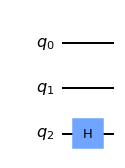

In [6]:
qc.h(2)
qc.draw('mpl')

Después, queremos convertir esto en un cuarto de vuelta adicional si el qubit 1 está en el estado $|1\rangle$

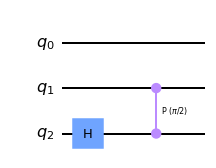

In [7]:
qc.cp(pi/2, 1, 2) #CROT desde q1 a q2
qc.draw('mpl')

Y queremos un octavo de vuelta si el qubit menos significativo (0) es $|1\rangle$:

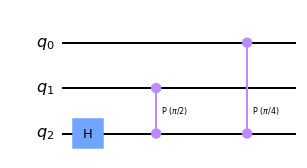

In [8]:
qc.cp(pi/4, 0, 2) #CROT desde q2 a q0
qc.draw('mpl')

ya tenemos listo a ese qubit así que podremos ignorarlo y continuar con los demás repitiendo el proceso para $q_0$ y $q_1$.

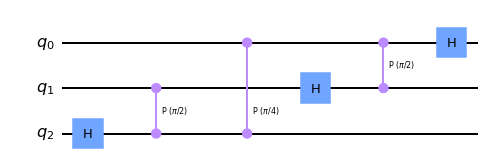

In [9]:
qc.h(1)
qc.cp(pi/2, 0, 1) #CROT desde q0 a q1
qc.h(0) # último qubit que no requiere CROT
qc.draw('mpl')

Finalmente, dado que aquí tomamos los más y menos significantes a la inversa, invertimos los qubits 0 y 2 (el 1 de cualquier forma quedaría en medio).

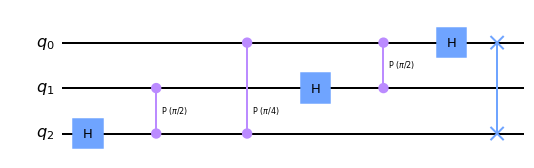

In [10]:
qc.swap(0, 2)
qc.draw('mpl')

### 8.2 QFT caso general

Ahora vamos a construir el caso general de la $QFT$ usando Qiskit.  De hecho, Qiskit muestra parte de su potencial al crear circuitos generales como este.

Es más fácil construir un circuito que implemente el QFT al revés y cambiarlos al final. Comenzaremos creando la función que rota nuestros qubits correctamente. Vamos a comenzar como lo hicimos en nuestro ejemplo de 3 qubits, rotando el qubit más significativo (el qubit con el indice más alto):

In [11]:
def qft_rotations(circuit, n):
    if n == 0: # Sal de la función si está vacío
        return circuit
    n -= 1 # Los indices comienzan desde 0 así que terminamos en n-1
    circuit.h(n) # Aplicamos la H al más significativo
    for qubit in range(n):
        # Por cada qubit menos significativo, aplicamos una rotación
        # de un ángulo cada vez más pequeño y por ellos lo elevamos a la n-qubit
        circuit.cp(pi/2**(n-qubit), qubit, n)

Vamos a ver como quedó esta parte:

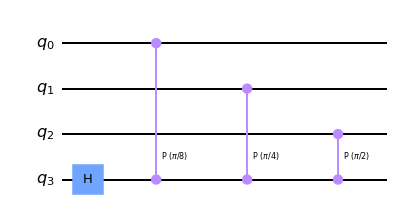

In [12]:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw('mpl')

Ya tenemos la primera parte de nuestro $QFT$. Ahora que ya tenemos correctamente rotado nuestro qubit más significativo, tenemos que rotar correctamente nuestro segundo qubit más significativo. Después, tendremos que hacerlo con el 3ro y así, pero ¿Cómo podríamos generalizarlo en código? Bueno, cuando lleguemos al final de nuestra función `qft_rotations()`m podremos usar el mismo código para repetir el proceso en $n-1$:

In [13]:
def qft_rotations(circuit, n):
    # Realiza qft en los primers n qubits del circuito
    # (sin intercambiar los más y menos significativos aún)
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2 ** (n-qubit), qubit, n)
    # Al final de la función la llamamos de forma recursiva
    # recordemos que ya redujimo n en la linea de arriba
    qft_rotations(circuit, n)

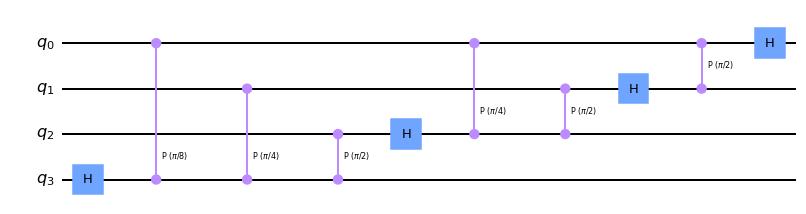

In [14]:
qc = QuantumCircuit(4)
qft_rotations(qc, 4)
qc.draw('mpl')

Finalmente, necesitamos agregar los sawps o intercambios al final del QFT para que encaje con nuestra definición del mismo, recordando que hasta ahora los tenemos implementados en orden inverso de qubits significativos. Vamos a combinar lo siguiente en nuestra función final `qft()`:

In [15]:
def swap_registers(circuit, n):
    for qubit in range(n//2): #Intecambia la mitad del circuito
        circuit.swap(qubit, n-qubit-1) # Gira alrededor de un eje imaginario 
        # Si es impar el "eje" es el número de enmedio
    return circuit


def qft(circuit, n):
    # Aplicamos QFT en los primeros n qubits
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

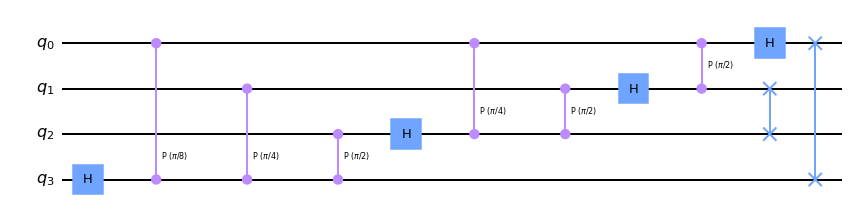

In [16]:
qc = QuantumCircuit(4)
qft(qc, 4)
qc.draw('mpl')

Este es el circuito generalizado para nuestra transformada de Fourier cuántica.

Vamos a demostrar que nuestro circuito funciona correctamente. Para ello, debemos de codificar nuestro número en una base computacional. Por ejemplo, el número 5 en binario, que es 101:

In [17]:
bin(5)

'0b101'

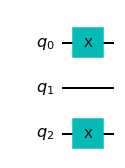

In [18]:
qc = QuantumCircuit(3)

# Codificamos el estado 5
qc.x(0)
qc.x(2)
qc.draw('mpl')

Y veamos el estado de nuestros qubits utilizando el `statevector_simulator`:

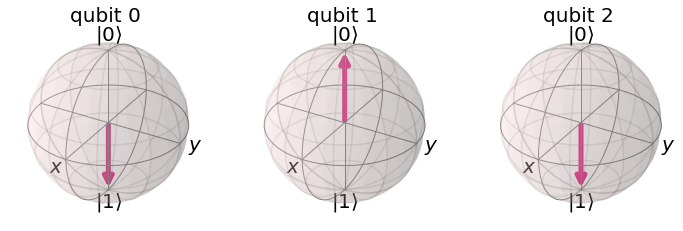

In [19]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

Finalmente, aplicamos nuestra QFT:

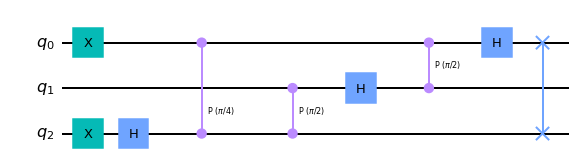

In [20]:
qft(qc, 3)
qc.draw('mpl')

In [21]:
# Quitando los warnings de incopatibilidad de Matplot
import warnings
from matplotlib.cbook import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

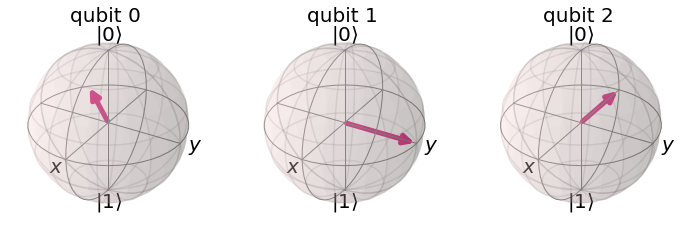

In [22]:
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

Podemos ver que nuestra QFT ha funcionado correctamente. Comparemos el estado $|\widetilde{0}\rangle = |{+}{+}{+}\rangle$. El qubit 0 ha sido rotado por $5/8$ de una vuelta completa, el qubit 1 ha rotado $1/4$ de vuelta y el qubit 2 has rotado $1/2$ de vuelta.

NOTA: Recordemos que está girando alrededor del eje Z, es decir, el eje Z se mantiene como su eje de simetría.

### 8.3 Corriendo una QFT en un dispositivo cuántico real